In [1]:
import numpy as np
import pathpy as pp
import math
import random
import matplotlib.pyplot as plt

## Diameter of random graphs

### a) 
We use $n = 100$ and vary $p \in \{0.1,0.2,\dots,0.9\}$. For each $p$ we generate 5 microstates and compute the mean diameter over them.

In [61]:
n = 100
num_microstates = 5
probs = np.arange(0.1, 0.9, step=0.1)
diameters = np.zeros_like(probs)
for i,p in enumerate(probs):
    microstates = [pp.generators.ER_np(n=n,p=p) for _ in range(num_microstates)]
    microstate_diameters = list(map(lambda net: net.diameter(), microstates))
    mean_diameter = np.mean(microstate_diameters)
    diameters[i] = mean_diameter

The following plot shows the mean diamter $D(p)$ versus $p$ in blue. The orange curve denotes the approximation $D \approx \frac{\log(n)}{\log(\langle k \rangle)} = \frac{\log(n)}{\log(np)}$. <br/> <br/>
While the overall tendency of both curves is the same, we observe rather large quantitative difference in the empirical and predicted values. We attribute this to the choice of $n$ being not sufficiently large. Larger $n$ do, however, exceed our computational capabilities.

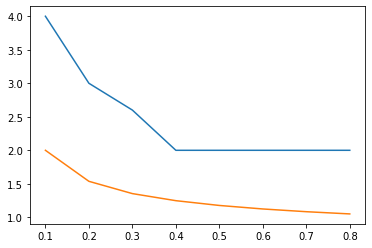

In [62]:
fig, ax = plt.subplots()
ax.plot(probs, diameters)
ax.plot(probs, np.log(n)/(np.log(n*probs)))


### b)
We set $\langle k \rangle = np = 5$ and vary $p \in \{0.1,0.2,\dots,0.9\}$. For each $p$, we compute $n = \frac{\langle k \rangle}{p}$.

In [64]:
def random_elment_from_dict(dict):
    key = random.choice(list(dict.keys()))
    return dict[key]


In [74]:
# Generate random microstates for varying p and pick a random node from each.
expected_degree = 15
microstates = []
probs = np.arange(0.1,0.9,step=0.1)
for i, p in enumerate(probs):
    n = int(expected_degree / p)
    microstates.append(pp.generators.ER_np(n=n,p=p,loops=True))

nodes = list(map(lambda net: random_elment_from_dict(net.nodes), microstates))
degrees = [ms.degrees()[node.uid] for (ms, node) in zip(microstates, nodes)]

The following plot depicts the degree of randomly chosen nodes from a microstate for each $p$.

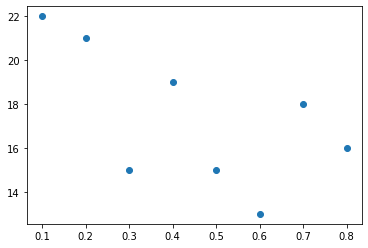

In [75]:
plt.scatter(probs, degrees)

We now randomly choose neighbors of the randomly chosen nodes and plot their degree distribution versus $p$.

In [80]:
neighbors = [random.choice(list(ms.neighbors[node.uid])) for (ms, node) in zip(microstates, nodes)]
neighbor_degrees = [ms.degrees()[node.uid] for (ms, node) in zip(microstates, neighbors)]

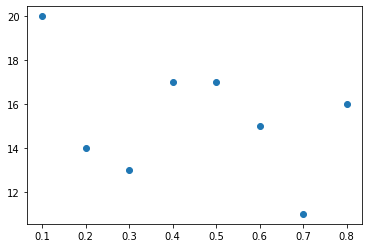

In [81]:
plt.scatter(probs, neighbor_degrees)

## Watts-Strogatz Model

### a)
Since weak ties are "bridges" between clusters in the graph, we can measure the extend to which an edge is weak by the fraction of shortest paths that included the edge. <br/> This is similar to how we define betweeness centrality for nodes.

In [44]:
# Generate a graph according to the watts-strogatz model
n = 50
p = 0.2
s = 3
net = pp.generators.Watts_Strogatz(n=n,p=p,s=s)

In [45]:
# Compute all pair shortest paths
shortest_paths, _ = pp.algorithms.all_shortest_paths(net)

In [46]:
# Count the number of shortest-paths each edge is a part of
# (This can probably be done more efficient lol)
for edge in net.edges:
    edge.weakness = 0
    for i in range(n):
        for j in range(i+1,n):
            paths = shortest_paths[f"{i}"][f"{j}"]
            for path in paths:
                for h in range(len(path) - 1):
                    e = path[h:h + 2]
                    if set(map(lambda x: x.uid, edge.nodes)) == set(e):
                        edge.weakness += 1

In [51]:
# Scale the measure of weakness to [0,1] and adjust color based on some threshold
# (We could not get pathpy to use (r,g,b) tuples)
max_weakness = max(map(lambda e: e.weakness, net.edges))
for edge in net.edges:
    edge.color = "red" if edge.weakness / max_weakness > 0.7 else "blue"

In [52]:
net.plot()

### c)

In [58]:
n = 100
S = np.arange(1,15)
num_microstates = 5
path_length = np.zeros_like(S)
for i,s in enumerate(S):
    microstates = [pp.generators.Watts_Strogatz(n=n,s=s,p=0) for _ in range(num_microstates)]
    path_length[i] =  np.mean(list(map(lambda x: x.avg_path_length(), microstates)))

<BarContainer object of 14 artists>

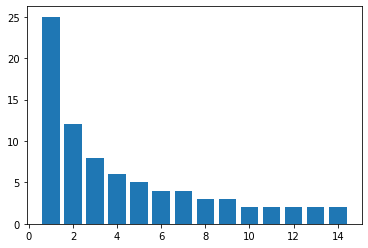

In [59]:
plt.bar(x=S,height=path_length)